# Integration of functions 
## Trapezoidal Rule

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import constants as const


In [65]:
def rho(r,sig = 10.):
    #G=6.67e-11
    density =  sig**2/(2*np.pi*(r**2)*const.G)
    return density

In [66]:
def funct(r):
#     print(rho(r))
    mass = 4*np.pi*(r**2)*rho(r)
    return mass

In [67]:
def trapezoid(a,b,N):
    h = (b-a)/N
    print(h)
    add =0.
    for k in range(1,N-1):
        r= a+(k*h)
        add += funct(r)
    
    output = h*((0.5*funct(a))+(0.5*funct(b))+add)
    return output

        

In [68]:
trapezoid(0.01,10,10000)

0.000999


<Quantity 2.993273e+13 kg s2 / m3>

## MonteCarlo Method


[1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
[1.43, 1.4596, 1.4446, 1.45552, 1.4454, 1.452484, 1.451426, 1.4517716]


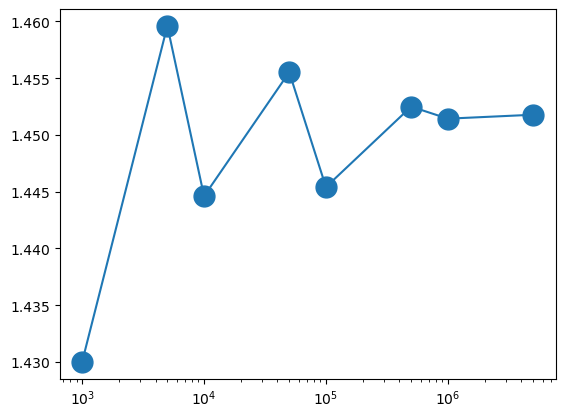

In [69]:
def integral(x):
    I = np.sin(1/(x*(2-x)))
    I=I**2
    return I

def NFW(r,rho0=1e8,rs=10.):
    f=4*np.pi*r*rho0*rs/((1+(r/rs))**2)
    return f

N=[10**3,5*10**3,10**4,5*10**4,10**5,5*10**5,10**6,5*10**6]


area =[]
for j in range(len(N)):
    x =np.random.uniform(0,2,N[j])
    y= np.random.uniform(0,1,N[j])
    curve = integral(x)
    count  = np.where(y<= curve,y,0)
    k = np.count_nonzero(count)
    
    I = (k*2)/N[j] 
    area.append(I)
# for i in range(N):
#     if y[i]<= curve[i]:
#         k+=1

# I = (k*2)/N
# print (I)
print(N)
print(area)
plt.plot(N,area,'o', markersize=15, linestyle='-')
plt.xscale('log')


## Mean-Value Method and Monte carlo

Mean Method
Using Monte Carlo Method


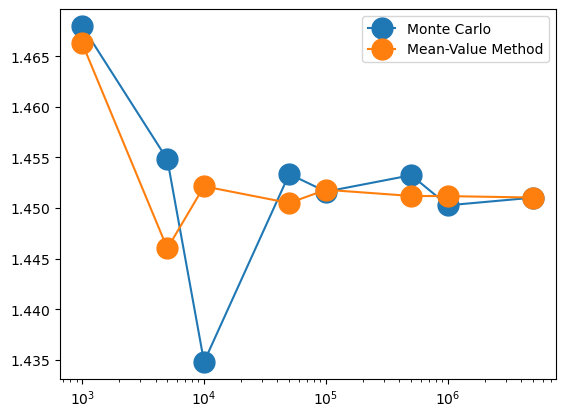

In [70]:


def integration(a,b,N,function,method = ''):
    area = np.zeros(len(N))
    I =np.zeros(len(N))
    for j in range(len(N)):
        x =np.random.uniform(0,b-a,N[j])
        y= np.random.uniform(0,1,N[j])
        func = function(x)
        #func = integral(x)        
        count  = np.where(y<= func,y,0)
        ########### Monte Carlo Method ##########
        k = np.count_nonzero(count)
        area[j] = (k*2)/N[j] 
        ########### Mean-Value Method ###########

        summation = np.sum(func)/N[j]
        I[j] = (b-a)*summation
    
    if method =='MonteCarlo':
        print("Using Monte Carlo Method")
        return area
    else :
        print("Mean Method")
        return I

N=[10**3,5*10**3,10**4,5*10**4,10**5,5*10**5,10**6,5*10**6]

mm = integration(0,2,N,integral,method = 'Mean Method')
mc = integration(0,2,N,integral,method = 'MonteCarlo')
# print(np.sum(area)/len(N))
# print(np.sum(I)/len(N))
# print(N)
# print(area)
# print(I)


################### PLOT #########################

a = plt.plot(N,mc,'o', markersize=15, linestyle='-',label = 'Monte Carlo')
b = plt.plot(N,mm,'o', markersize=15, linestyle='-',label = 'Mean-Value Method')
plt.xscale('log')
plt.legend()


## Importance Sampling


In [83]:
def target_function_f(x):
    f=(x**(-0.5)/(np.exp(x)+1))
    return f
#function is  dived by omega=x^(-1/2)
def proposal_distribution_w(x):
    y = x**(-0.5)
    return y
###### we will inverse sample form the prosposal distribution so  in this case x = y**2 #######
def sampling_function_x(y):
    x =y**2
    return x
Imps_val =np.zeros(len(N))
for j in range(len(N)):
    y = np.random.uniform(0,1,N[j])
    samples = sampling_function_x(y)
    weight = target_function_f(samples)/proposal_distribution_w(samples)
    Imps_val[j] = np.mean(weight*2)

print(Imps_val)


[0.83780332 0.83684846 0.83733583 0.83941951 0.83925973 0.83881955
 0.83894729 0.83894977]


Mean Method


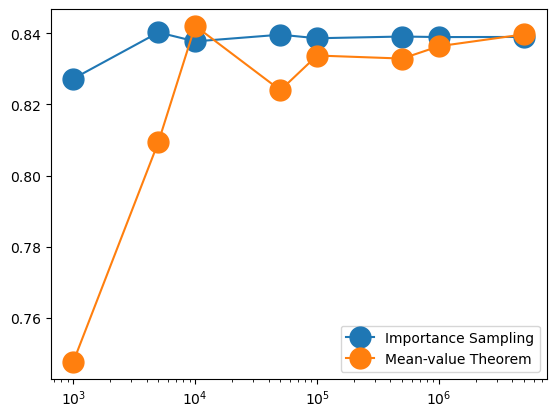

In [82]:
mean = integration(0.,1.,N,target_function_f,method = '')

##### Plot #######
plt.plot(N,Imps_val,'o', markersize=15, linestyle='-',label = 'Importance Sampling')
plt.plot(N,mean,'o', markersize=15, linestyle='-',label = 'Mean-value Theorem')
plt.xscale('log')
plt.legend()
